In [ ]:
# Decision Trees are a non-parametric supervised learning method used for classification and regression. 
# ** The goal is to create a model that predicts the value of a target**  variable by learning simple 
# decision rules inferred from the data features.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [6]:
df = pd.read_csv("../data/creditRisque.csv")

In [7]:
df.head()

,Income,Credit History,Risk
0,0,Unknown,High
1,0,Bad,High
2,0,Good,High
3,14000,Unknown,High
4,14000,Bad,High


In [8]:
df.dtypes

Income             int64
Credit History    object
Risk              object
dtype: object

## PLOTTING DATA

<AxesSubplot:xlabel='Income', ylabel='Credit History'>

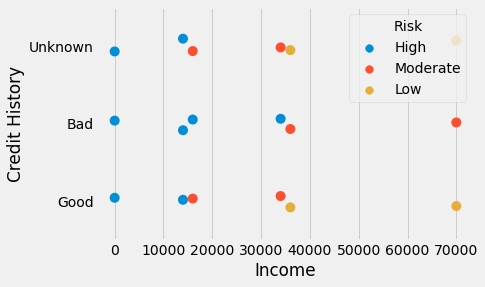

In [9]:
import seaborn as sns

sns.stripplot(data = df, x = "Income", y = "Credit History", hue = "Risk", size = 10)

## PREPARING DATA

In [10]:
df.Risk.unique()

array(['High', 'Moderate', 'Low'], dtype=object)

In [11]:
Risk_mapping = {
       'High': 2,
       'Moderate': 1,
       'Low': 0}

In [12]:
df['Risk'] = df['Risk'].map(Risk_mapping)

In [13]:
df['Credit History'].unique()

array(['Unknown', 'Bad', 'Good'], dtype=object)

In [14]:
Credit_mapping = {
        'Unknown': 0,
        'Bad': -1,
        'Good': 1}

In [15]:
df['Credit History'] = df['Credit History'].map(Credit_mapping)

In [16]:
df.head()

,Income,Credit History,Risk
0,0,0,2
1,0,-1,2
2,0,1,2
3,14000,0,2
4,14000,-1,2


<AxesSubplot:xlabel='Income', ylabel='Credit History'>

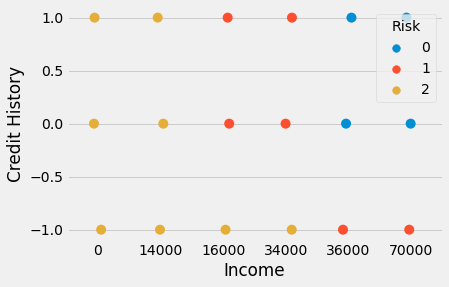

In [17]:
sns.stripplot(data = df, x = "Income", y = "Credit History", hue = "Risk", size = 10)

In [20]:
from pycaret.classification import *
exp_name = setup(data = df,  target = 'Risk', fold = 3)

,Description,Value
0,session_id,3723
1,Target,Risk
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2"
4,Original Data,"(18, 3)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.2500,0.3333,0.1667,0.1667,0.2000,-0.3333,-0.3873
1,0.0000,0.2500,0.0000,0.0000,0.0000,-0.4545,-0.6455
2,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.2500,0.1944,0.0556,0.0556,0.0667,-0.2626,-0.3443
SD,0.2041,0.1416,0.0786,0.0786,0.0943,0.1922,0.2653


In [22]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5000,0.5000,0.3333,0.2500,0.3333,0.0000,0.0000
1,0.5000,0.5000,0.3333,0.2500,0.3333,0.0000,0.0000
2,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.5000,0.3333,0.2222,0.1667,0.2222,0.0000,0.0000
SD,0.0000,0.2357,0.1571,0.1179,0.1571,0.0000,0.0000


In [23]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5000,0.3333,0.2222,0.1667,0.2222,0.0000,0.0000,0.5767
svm,SVM - Linear Kernel,0.4167,0.0000,0.2222,0.1042,0.1444,0.0000,0.0000,0.3600
xgboost,Extreme Gradient Boosting,0.4167,0.4028,0.2222,0.1319,0.1667,0.0370,0.0430,0.5900
lr,Logistic Regression,0.3333,0.4028,0.1111,0.0833,0.1111,-0.1515,-0.2152,0.0133
ridge,Ridge Classifier,0.3333,0.0000,0.1111,0.0833,0.1111,-0.1515,-0.2152,0.4033
ada,Ada Boost Classifier,0.3333,0.3403,0.1667,0.0764,0.1000,-0.1111,-0.1291,0.4067
et,Extra Trees Classifier,0.3333,0.3472,0.1667,0.0764,0.1000,-0.1111,-0.1291,0.5833
catboost,CatBoost Classifier,0.3333,0.1528,0.1667,0.0764,0.1000,-0.1111,-0.1291,0.6633
dt,Decision Tree Classifier,0.2500,0.1944,0.0556,0.0556,0.0667,-0.2626,-0.3443,0.5000
rf,Random Forest Classifier,0.2500,0.3611,0.0556,0.0833,0.0833,-0.2182,-0.2897,0.4200


In [ ]:
# # Understanding how the Decision Tree works
# # Terminology

# # Each root node represents a single input variable (x) and a split point on that variable.
# # The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.
# # Growing the tree

# # The first choice we have is how many branches we split the trees. And we choose Binary Tree because otherwise 
# # it will explode due to combinatorial explosion. So BINARY TREES is a practical consideration.
# # The second decision is to choose which variable and where to split it. We need to have an objective function 
# to do this
# # One objective function is to maximize the information gain (IG) at each split:

# # $$ IG(D_p,f)= I(D_p) - \frac{N_{right}}{N} I(D_{right}) - \frac{N_{left}}{N} I(D_{left}) $$
# # where:

# # f is the feature to perform the split
# # $D_p$, $D_{left}$, and $D_{right}$ are the datasets of the parent, left and right child node, respectively
# # I is the impurity measure
# # N is the total number of samples
# # $N_{left}$ and $N_{right}$ is the number of samples in the left and right child node.
# # Now we need to first define an Impurity measure. The three popular impurity measures are:

# # - Gini Impurity
# # - Entropy
# # - Classification Error

# # Gini Impurity and Entropy lead to similiar results when growing the tree, while Classification error is not 
# as useful for growing the tree (but for pruning the tree) - See example 
# here http://sebastianraschka.com/faq/docs/decision-tree-binary.html

# # Lets understand Gini Impurity a little better. Gini impurity is a measure of how often a randomly 
# chosen element from the set would be incorrectly labeled if it was randomly labeled according 
# to the distribution of labels in the subset, Gini impurity can be computed by summing 
# the probability $t_{i} $ of an item with label $i$ being chosen times the probability 
# $ 1-t_{i}$ of a mistake in categorizing that item.

# # $$ I_{G}(f)=\sum _{i=1}^{J}t_{i}(1-t_{i})=\sum _{i=1}^{J}(t_{i}-{t_{i}}^{2})=\sum _{i=1}
# ^{J}t_{i}-\sum _{i=1}^{J}{t_{i}}^{2}=1-\sum _{i=1}^{J}{t_{i}}^{2} $$
# # Lets calculate the Gini for the overall data set:
# # Low - 4, Moderate - 6, High - 8 and total observations are 18

# # $$ I_G(t) = 1 - \left(\frac{6}{18}\right)^2 - \left(\frac{4}{18}\right)^2 - \left(\frac{8}{18}\right)^2 =
# 1 - \frac{116}{256} = 0.642 $$
# # scikit-learn uses an optimized CART algorithm, which will use a greedy approach. A greedy approach 
# is used to divide the space called recursive binary splitting. This is a numerical procedure where all 
# the values are lined up and different split points are tried and tested using a objective cost function.
# The split with the best cost (lowest cost because we minimize cost) is selected.

# # Another way to think of this is that a learned binary tree is actually a partitioning of the input 
# space. You can think of each input variable as a dimension on an p-dimensional space. The decision tree 
# split this up into rectangles (when p=2 input variables) or some kind of hyper-rectangles with more inputs.